In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('insurance.csv')
df.sample(20)


,age,sex,bmi,children,smoker,region,charges
68,40,female,36.190,0,no,southeast,5920.10410
1098,52,female,30.875,0,no,northeast,23045.56616
1071,63,male,31.445,0,no,northeast,13974.45555
139,22,female,36.000,0,no,southwest,2166.73200
762,33,male,27.100,1,yes,southwest,19040.87600
86,57,female,31.160,0,yes,northwest,43578.93940
1024,47,female,45.320,1,no,southeast,8569.86180
285,46,male,26.620,1,no,southeast,7742.10980
304,57,female,38.000,2,no,southwest,12646.20700
739,29,male,35.500,2,yes,southwest,44585.45587


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop duplicate rows across all columns
    df = df.drop_duplicates()
    # Drop rows with missing data across all columns
    df = df.dropna()
    return df

df_clean = clean_data(df.copy())
df_clean.head()

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [62]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [63]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [64]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [65]:
df.sample(20)

,age,sex,bmi,children,smoker,region,charges
1197,41,1,33.550,0,0,southeast,5699.83750
1182,25,0,30.300,0,0,southwest,2632.99200
1172,56,0,41.910,0,0,southeast,11093.62290
992,50,0,31.600,2,0,southwest,10118.42400
674,44,0,43.890,2,1,southeast,46200.98510
1320,31,1,31.065,3,0,northwest,5425.02335
889,57,1,33.630,1,0,northwest,11945.13270
625,29,0,26.030,0,0,northwest,3736.46470
715,60,1,28.900,0,0,southwest,12146.97100
495,20,1,27.930,0,0,northeast,1967.02270


In [66]:
df = df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

In [67]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

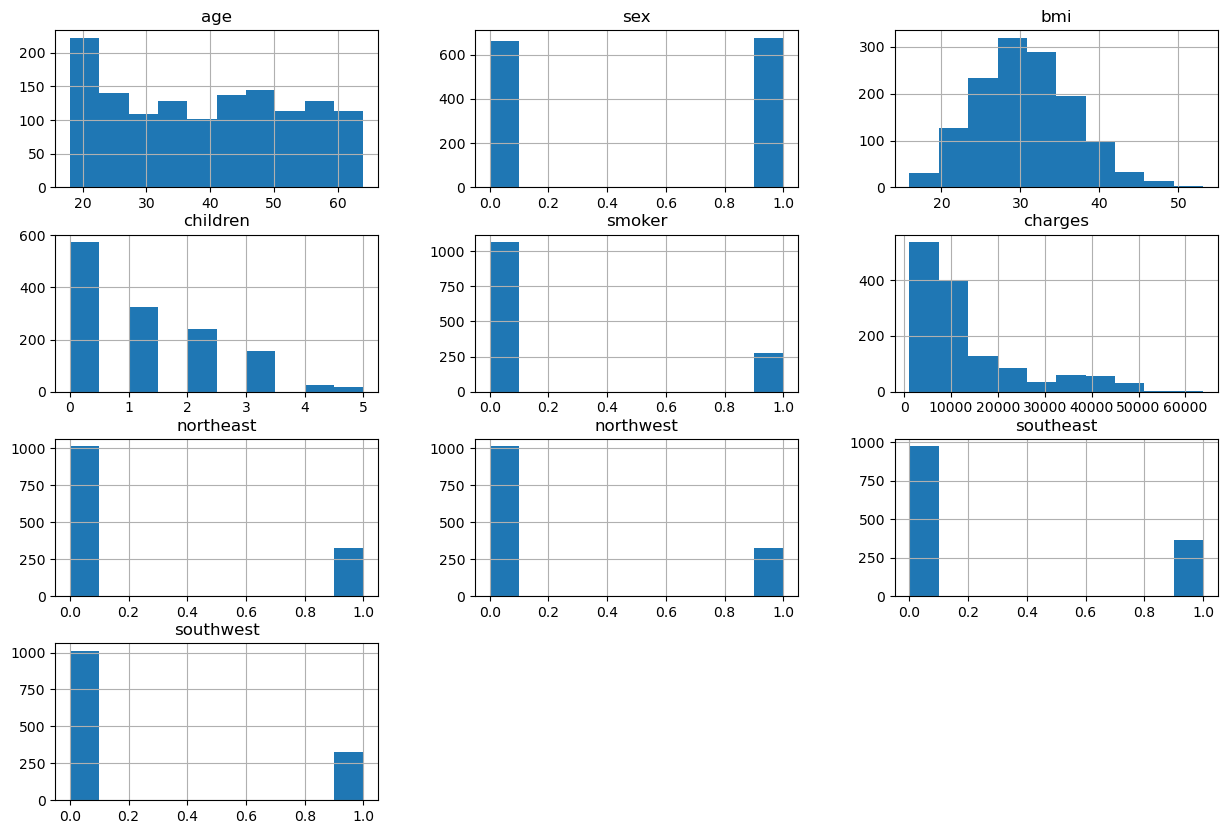

In [68]:
df.hist(figsize=(15, 10))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int64  
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


<Axes: >

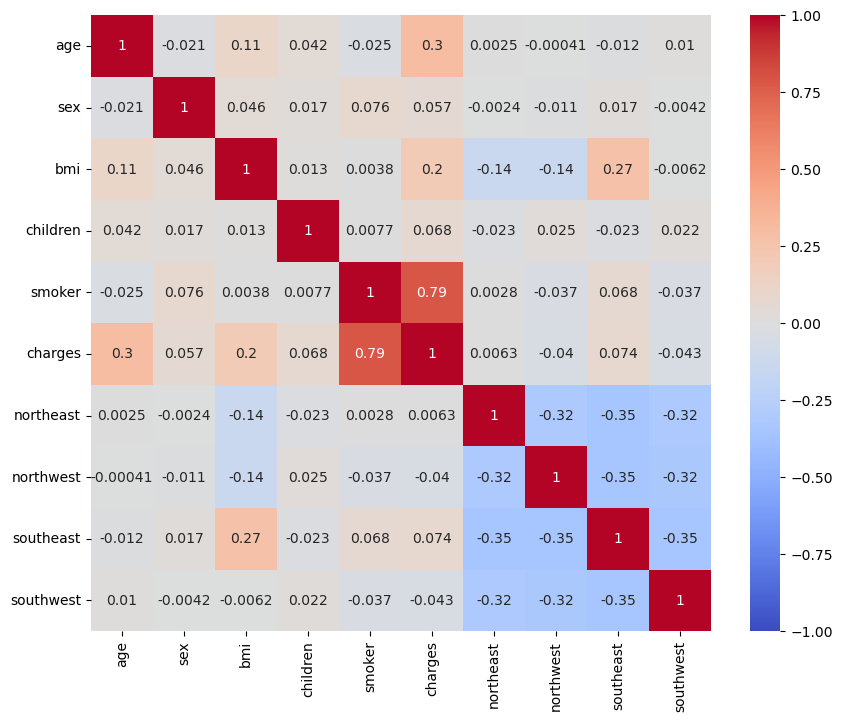

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1)

In [73]:
model.score(X_test, y_test)

0.8245549443407566

In [74]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

4955.048120752843

In [75]:
df.charges.std()

12110.011236693996

In [76]:
y_test.std()

11851.929952085387

In [77]:
df.charges.median()

9382.033

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mae

2838.162866159714

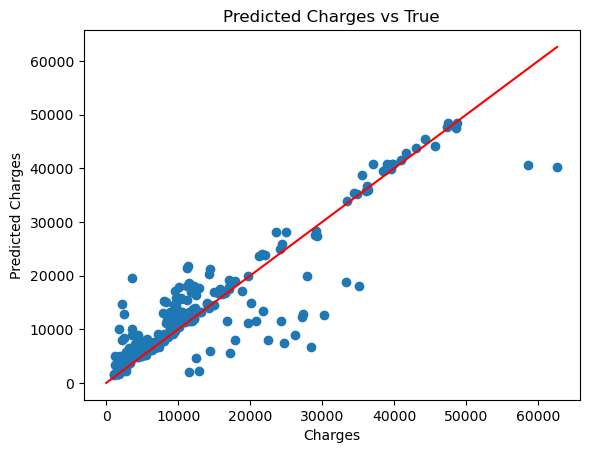

In [79]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)) , color='red')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges vs True')
plt.show()

In [80]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True)

Text(0.5, 1.0, 'Feature Importances')

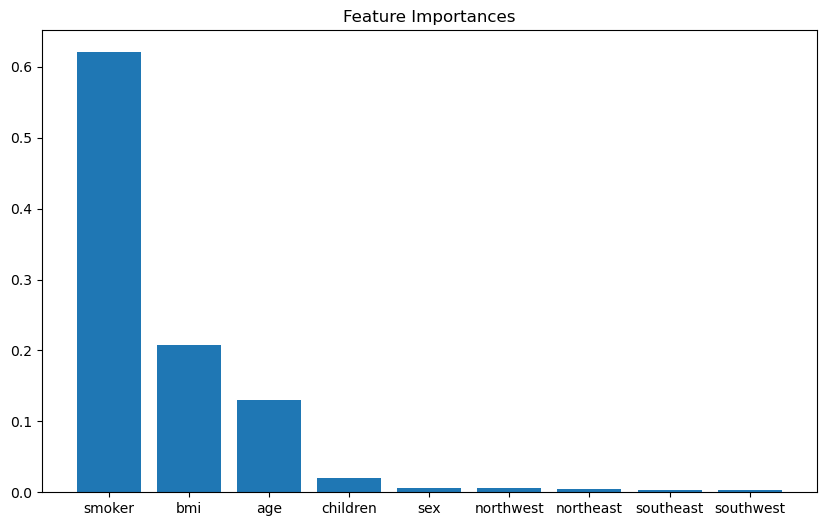

In [81]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature Importances')

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

# fold1 fold2 fold3 fold4 fold5

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [84]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [85]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                      n_jobs=-1)

In [86]:
model.score(X_test, y_test)

0.857445772015295

In [87]:
y_pred = model.predict(X_test)


In [88]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

4466.500232520775

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mae

2606.862663361074

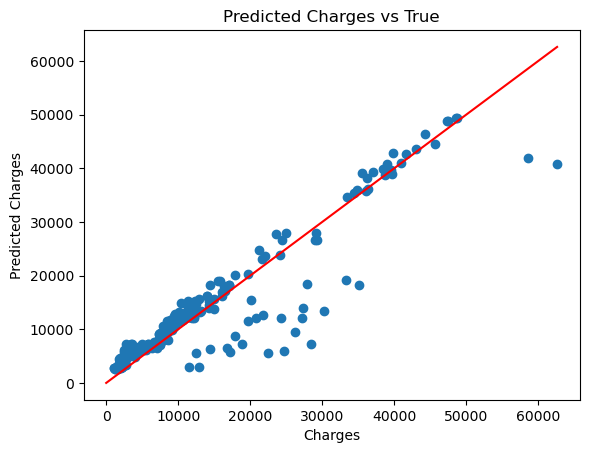

In [90]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)) , color='red')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges vs True')
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

# fold1 fold2 fold3 fold4 fold5

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='neg_mean_absolute_error')

In [93]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [94]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_jobs=-1)

In [95]:
model.score(X_test, y_test)

0.8578816444032863

In [96]:
y_pred = model.predict(X_test)


In [97]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

4459.6666416241815

In [98]:
mae = mean_absolute_error(y_test, y_pred)
mae

2598.3221479440826

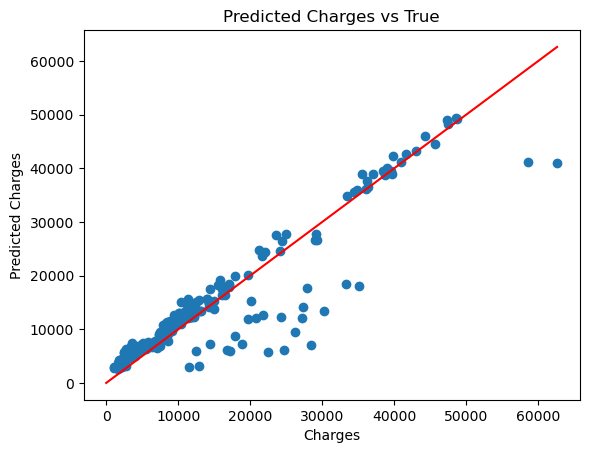

In [99]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)) , color='red')
plt.xlabel('Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted Charges vs True')
plt.show()